In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy
import tensorflow as tf
import sklearn
import lifelines
import shap
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [110]:
df = pd.read_csv("Corruption Dataset (2009 to 2018) vFinal.csv")
df.set_index(df["Country"],inplace=True)
df.drop("Country",axis=1,inplace=True)

In [111]:
X=df.drop("IFF",axis=1)
y=df['IFF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [112]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
scipy.stats.pearsonr(y_test, predictions)

PearsonRResult(statistic=0.8495825302955587, pvalue=8.833500389182618e-85)

In [113]:
#PearsonRResult(statistic=0.8495825302955587, pvalue=8.833500389182618e-85)

In [114]:
from sklearn.ensemble import RandomForestRegressor
X=df.drop("IFF",axis=1)
y=df['IFF']

X_train, X_test, y_train, y_test = train_test_split(X, y)
feature_names = list(X.columns)
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)
scipy.stats.pearsonr(y_test, predictions)

PearsonRResult(statistic=0.8669152864768972, pvalue=4.156030544369513e-92)

In [115]:
#PearsonRResult(statistic=0.8556303856911687, pvalue=3.1533830228456137e-87)

In [116]:
importances = rfr.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

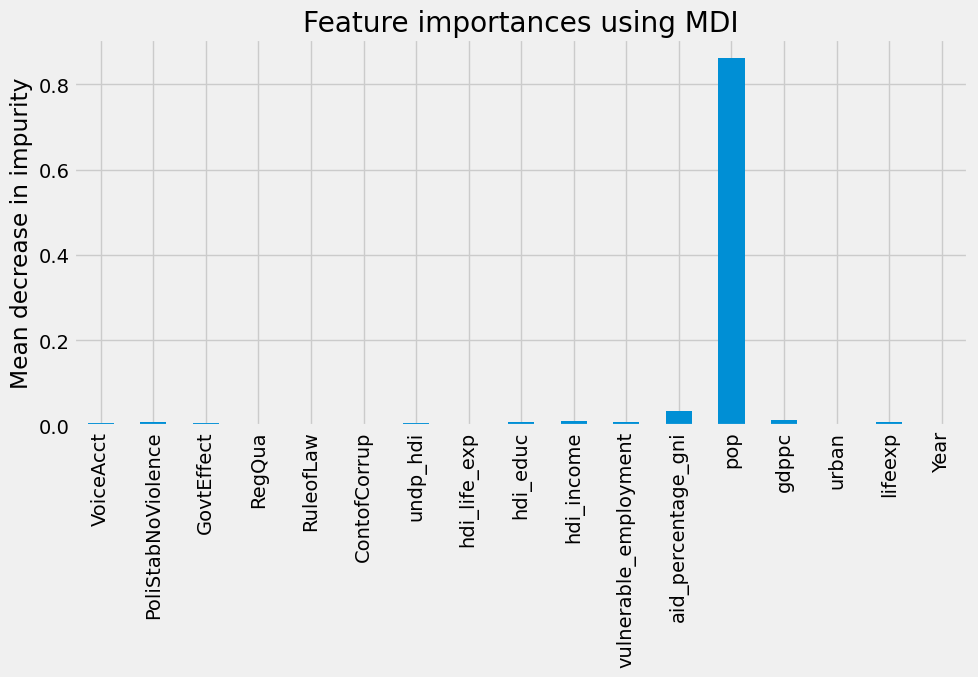

In [117]:
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [39]:
plt.rcParams['figure.figsize'] = [10, 7]

In [40]:
df = pd.read_csv("Corruption Dataset (2009 to 2018) vFinal - W Names.csv")
df.set_index(df["Country"],inplace=True)
df.drop("Country",axis=1,inplace=True)
dataset = df.values
y = dataset[:, 0]
X = dataset[:, 1:18]

In [41]:
features = df.drop("IFF",axis=1).columns.values

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 101)

In [45]:
model = Sequential()

# input layer
model.add(Dense(162,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(81, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [46]:
hist = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=1600)

Epoch 1/1600

8/8 [==============================] - 1s 22ms/step - loss: 575909504.0000 - val_loss: 765669376.0000
Epoch 2/1600
8/8 [==============================] - 0s 6ms/step - loss: 575901760.0000 - val_loss: 765654656.0000
Epoch 3/1600
8/8 [==============================] - 0s 8ms/step - loss: 575881088.0000 - val_loss: 765625344.0000
Epoch 4/1600
8/8 [==============================] - 0s 8ms/step - loss: 575848192.0000 - val_loss: 765563584.0000
Epoch 5/1600
8/8 [==============================] - 0s 7ms/step - loss: 575792192.0000 - val_loss: 765438528.0000
Epoch 6/1600
8/8 [==============================] - 0s 5ms/step - loss: 575656960.0000 - val_loss: 765173440.0000
Epoch 7/1600
8/8 [==============================] - 0s 7ms/step - loss: 575471424.0000 - val_loss: 764631744.0000
Epoch 8/1600
8/8 [==============================] - 0s 7ms/step - loss: 574758144.0000 - val_loss: 763556096.0000
Epoch 9/1600
8/8 [==============================] - 0s 8ms/step - loss: 573366272.0000

8/8 [==============================] - 0s 8ms/step - loss: 100796120.0000 - val_loss: 86486704.0000
Epoch 142/1600
8/8 [==============================] - 0s 6ms/step - loss: 92209816.0000 - val_loss: 86518752.0000
Epoch 143/1600
8/8 [==============================] - 0s 5ms/step - loss: 124957464.0000 - val_loss: 86673736.0000
Epoch 144/1600
8/8 [==============================] - 0s 6ms/step - loss: 104130280.0000 - val_loss: 87386696.0000
Epoch 145/1600
8/8 [==============================] - 0s 7ms/step - loss: 128997480.0000 - val_loss: 92097928.0000
Epoch 146/1600
8/8 [==============================] - 0s 6ms/step - loss: 94990560.0000 - val_loss: 96945320.0000
Epoch 147/1600
8/8 [==============================] - 0s 6ms/step - loss: 95688200.0000 - val_loss: 92743904.0000
Epoch 148/1600
8/8 [==============================] - 0s 7ms/step - loss: 84680176.0000 - val_loss: 88836720.0000
Epoch 149/1600
8/8 [==============================] - 0s 7ms/step - loss: 86727472.0000 - val_loss:

8/8 [==============================] - 0s 7ms/step - loss: 154605488.0000 - val_loss: 72958416.0000
Epoch 284/1600
8/8 [==============================] - 0s 6ms/step - loss: 72308464.0000 - val_loss: 74788600.0000
Epoch 285/1600
8/8 [==============================] - 0s 8ms/step - loss: 97175712.0000 - val_loss: 68406648.0000
Epoch 286/1600
8/8 [==============================] - 0s 7ms/step - loss: 57783024.0000 - val_loss: 67504272.0000
Epoch 287/1600
8/8 [==============================] - 0s 8ms/step - loss: 106900488.0000 - val_loss: 67475120.0000
Epoch 288/1600
8/8 [==============================] - 0s 7ms/step - loss: 95698560.0000 - val_loss: 67672136.0000
Epoch 289/1600
8/8 [==============================] - 0s 7ms/step - loss: 87083384.0000 - val_loss: 67248784.0000
Epoch 290/1600
8/8 [==============================] - 0s 7ms/step - loss: 90004528.0000 - val_loss: 67246248.0000
Epoch 291/1600
8/8 [==============================] - 0s 8ms/step - loss: 86107808.0000 - val_loss: 6

Epoch 355/1600
8/8 [==============================] - 0s 6ms/step - loss: 83446512.0000 - val_loss: 67508704.0000
Epoch 356/1600
8/8 [==============================] - 0s 6ms/step - loss: 94183880.0000 - val_loss: 67632080.0000
Epoch 357/1600
8/8 [==============================] - 0s 5ms/step - loss: 56900484.0000 - val_loss: 66922736.0000
Epoch 358/1600
8/8 [==============================] - 0s 6ms/step - loss: 95464560.0000 - val_loss: 65963740.0000
Epoch 359/1600
8/8 [==============================] - 0s 5ms/step - loss: 95954680.0000 - val_loss: 65375344.0000
Epoch 360/1600
8/8 [==============================] - 0s 9ms/step - loss: 91258264.0000 - val_loss: 67563856.0000
Epoch 361/1600
8/8 [==============================] - 0s 7ms/step - loss: 76614792.0000 - val_loss: 66720400.0000
Epoch 362/1600
8/8 [==============================] - 0s 7ms/step - loss: 63266436.0000 - val_loss: 66899184.0000
Epoch 363/1600
8/8 [==============================] - 0s 8ms/step - loss: 106431872.0000

8/8 [==============================] - 0s 10ms/step - loss: 85634136.0000 - val_loss: 65190188.0000
Epoch 498/1600
8/8 [==============================] - 0s 10ms/step - loss: 64109836.0000 - val_loss: 65679808.0000
Epoch 499/1600
8/8 [==============================] - 0s 9ms/step - loss: 90909064.0000 - val_loss: 64398796.0000
Epoch 500/1600
8/8 [==============================] - 0s 9ms/step - loss: 58784900.0000 - val_loss: 62658824.0000
Epoch 501/1600
8/8 [==============================] - 0s 10ms/step - loss: 98158904.0000 - val_loss: 63066452.0000
Epoch 502/1600
8/8 [==============================] - 0s 9ms/step - loss: 73742112.0000 - val_loss: 65987608.0000
Epoch 503/1600
8/8 [==============================] - 0s 9ms/step - loss: 137230368.0000 - val_loss: 72347184.0000
Epoch 504/1600
8/8 [==============================] - 0s 9ms/step - loss: 121288616.0000 - val_loss: 77998816.0000
Epoch 505/1600
8/8 [==============================] - 0s 11ms/step - loss: 86942984.0000 - val_los

8/8 [==============================] - 0s 10ms/step - loss: 64158636.0000 - val_loss: 61577008.0000
Epoch 640/1600
8/8 [==============================] - 0s 9ms/step - loss: 63777976.0000 - val_loss: 64013096.0000
Epoch 641/1600
8/8 [==============================] - 0s 9ms/step - loss: 67407568.0000 - val_loss: 69322376.0000
Epoch 642/1600
8/8 [==============================] - 0s 9ms/step - loss: 138562400.0000 - val_loss: 66486208.0000
Epoch 643/1600
8/8 [==============================] - 0s 8ms/step - loss: 83551328.0000 - val_loss: 64279320.0000
Epoch 644/1600
8/8 [==============================] - 0s 9ms/step - loss: 92849800.0000 - val_loss: 61250840.0000
Epoch 645/1600
8/8 [==============================] - 0s 13ms/step - loss: 76613856.0000 - val_loss: 58876868.0000
Epoch 646/1600
8/8 [==============================] - 0s 10ms/step - loss: 95512904.0000 - val_loss: 59048364.0000
Epoch 647/1600
8/8 [==============================] - 0s 10ms/step - loss: 69171896.0000 - val_loss

8/8 [==============================] - 0s 9ms/step - loss: 114180024.0000 - val_loss: 58722356.0000
Epoch 782/1600
8/8 [==============================] - 0s 8ms/step - loss: 88361680.0000 - val_loss: 56490676.0000
Epoch 783/1600
8/8 [==============================] - 0s 7ms/step - loss: 89184216.0000 - val_loss: 56426932.0000
Epoch 784/1600
8/8 [==============================] - 0s 7ms/step - loss: 78648296.0000 - val_loss: 56784100.0000
Epoch 785/1600
8/8 [==============================] - 0s 8ms/step - loss: 61487976.0000 - val_loss: 57838756.0000
Epoch 786/1600
8/8 [==============================] - 0s 7ms/step - loss: 107596656.0000 - val_loss: 61975560.0000
Epoch 787/1600
8/8 [==============================] - 0s 8ms/step - loss: 61261176.0000 - val_loss: 57818472.0000
Epoch 788/1600
8/8 [==============================] - 0s 10ms/step - loss: 153154976.0000 - val_loss: 59078504.0000
Epoch 789/1600
8/8 [==============================] - 0s 10ms/step - loss: 46869096.0000 - val_loss

8/8 [==============================] - 0s 9ms/step - loss: 112075008.0000 - val_loss: 52619996.0000
Epoch 924/1600
8/8 [==============================] - 0s 7ms/step - loss: 102510936.0000 - val_loss: 53814552.0000
Epoch 925/1600
8/8 [==============================] - 0s 9ms/step - loss: 109450512.0000 - val_loss: 56934680.0000
Epoch 926/1600
8/8 [==============================] - 0s 11ms/step - loss: 81174512.0000 - val_loss: 51882436.0000
Epoch 927/1600
8/8 [==============================] - 0s 14ms/step - loss: 61290276.0000 - val_loss: 51404348.0000
Epoch 928/1600
8/8 [==============================] - 0s 11ms/step - loss: 69638480.0000 - val_loss: 55336792.0000
Epoch 929/1600
8/8 [==============================] - 0s 9ms/step - loss: 44431912.0000 - val_loss: 54497892.0000
Epoch 930/1600
8/8 [==============================] - 0s 8ms/step - loss: 75051992.0000 - val_loss: 52545680.0000
Epoch 931/1600
8/8 [==============================] - 0s 9ms/step - loss: 71907328.0000 - val_los

8/8 [==============================] - 0s 10ms/step - loss: 82928800.0000 - val_loss: 53482224.0000
Epoch 1066/1600
8/8 [==============================] - 0s 9ms/step - loss: 70315952.0000 - val_loss: 50444400.0000
Epoch 1067/1600
8/8 [==============================] - 0s 8ms/step - loss: 94273184.0000 - val_loss: 51235124.0000
Epoch 1068/1600
8/8 [==============================] - 0s 8ms/step - loss: 101261408.0000 - val_loss: 56635032.0000
Epoch 1069/1600
8/8 [==============================] - 0s 10ms/step - loss: 97271008.0000 - val_loss: 57767588.0000
Epoch 1070/1600
8/8 [==============================] - 0s 10ms/step - loss: 211944432.0000 - val_loss: 50179036.0000
Epoch 1071/1600
8/8 [==============================] - 0s 7ms/step - loss: 72443520.0000 - val_loss: 50335492.0000
Epoch 1072/1600
8/8 [==============================] - 0s 8ms/step - loss: 66377908.0000 - val_loss: 52419284.0000
Epoch 1073/1600
8/8 [==============================] - 0s 7ms/step - loss: 117112952.0000 -

8/8 [==============================] - 0s 9ms/step - loss: 48415340.0000 - val_loss: 55999660.0000
Epoch 1137/1600
8/8 [==============================] - 0s 6ms/step - loss: 108371608.0000 - val_loss: 56178576.0000
Epoch 1138/1600
8/8 [==============================] - 0s 8ms/step - loss: 103463080.0000 - val_loss: 54308796.0000
Epoch 1139/1600
8/8 [==============================] - 0s 10ms/step - loss: 62753256.0000 - val_loss: 52493396.0000
Epoch 1140/1600
8/8 [==============================] - 0s 9ms/step - loss: 67959696.0000 - val_loss: 50824668.0000
Epoch 1141/1600
8/8 [==============================] - 0s 9ms/step - loss: 98610896.0000 - val_loss: 52413740.0000
Epoch 1142/1600
8/8 [==============================] - 0s 10ms/step - loss: 51216812.0000 - val_loss: 48954424.0000
Epoch 1143/1600
8/8 [==============================] - 0s 13ms/step - loss: 69718232.0000 - val_loss: 48963932.0000
Epoch 1144/1600
8/8 [==============================] - 0s 11ms/step - loss: 93048192.0000 -

8/8 [==============================] - 0s 7ms/step - loss: 103645512.0000 - val_loss: 54434408.0000
Epoch 1208/1600
8/8 [==============================] - 0s 9ms/step - loss: 33253890.0000 - val_loss: 52599044.0000
Epoch 1209/1600
8/8 [==============================] - 0s 8ms/step - loss: 163848352.0000 - val_loss: 56725320.0000
Epoch 1210/1600
8/8 [==============================] - 0s 7ms/step - loss: 120359784.0000 - val_loss: 51833636.0000
Epoch 1211/1600
8/8 [==============================] - 0s 8ms/step - loss: 63029032.0000 - val_loss: 51776272.0000
Epoch 1212/1600
8/8 [==============================] - 0s 9ms/step - loss: 89578536.0000 - val_loss: 54620872.0000
Epoch 1213/1600
8/8 [==============================] - 0s 7ms/step - loss: 95040592.0000 - val_loss: 56037668.0000
Epoch 1214/1600
8/8 [==============================] - 0s 7ms/step - loss: 51956516.0000 - val_loss: 59432340.0000
Epoch 1215/1600
8/8 [==============================] - 0s 8ms/step - loss: 101848712.0000 - v

Epoch 1349/1600
8/8 [==============================] - 0s 11ms/step - loss: 62256648.0000 - val_loss: 52173976.0000
Epoch 1350/1600
8/8 [==============================] - 0s 9ms/step - loss: 59728628.0000 - val_loss: 57070300.0000
Epoch 1351/1600
8/8 [==============================] - 0s 11ms/step - loss: 41254372.0000 - val_loss: 60447720.0000
Epoch 1352/1600
8/8 [==============================] - 0s 14ms/step - loss: 86362088.0000 - val_loss: 58851364.0000
Epoch 1353/1600
8/8 [==============================] - 0s 11ms/step - loss: 86189912.0000 - val_loss: 55700496.0000
Epoch 1354/1600
8/8 [==============================] - 0s 12ms/step - loss: 49863240.0000 - val_loss: 54017620.0000
Epoch 1355/1600
8/8 [==============================] - 0s 13ms/step - loss: 61525372.0000 - val_loss: 52631468.0000
Epoch 1356/1600
8/8 [==============================] - 0s 13ms/step - loss: 64486188.0000 - val_loss: 54874820.0000
Epoch 1357/1600
8/8 [==============================] - 0s 9ms/step - loss

Epoch 1420/1600
8/8 [==============================] - 0s 7ms/step - loss: 57907500.0000 - val_loss: 50703720.0000
Epoch 1421/1600
8/8 [==============================] - 0s 7ms/step - loss: 100875944.0000 - val_loss: 53604204.0000
Epoch 1422/1600
8/8 [==============================] - 0s 8ms/step - loss: 54410172.0000 - val_loss: 55899060.0000
Epoch 1423/1600
8/8 [==============================] - 0s 8ms/step - loss: 78467424.0000 - val_loss: 51115428.0000
Epoch 1424/1600
8/8 [==============================] - 0s 8ms/step - loss: 135969792.0000 - val_loss: 47460956.0000
Epoch 1425/1600
8/8 [==============================] - 0s 7ms/step - loss: 119058448.0000 - val_loss: 49003100.0000
Epoch 1426/1600
8/8 [==============================] - 0s 10ms/step - loss: 87752456.0000 - val_loss: 50082840.0000
Epoch 1427/1600
8/8 [==============================] - 0s 12ms/step - loss: 91273616.0000 - val_loss: 47600580.0000
Epoch 1428/1600
8/8 [==============================] - 0s 9ms/step - loss: 

Epoch 1491/1600
8/8 [==============================] - 0s 11ms/step - loss: 73917448.0000 - val_loss: 47732148.0000
Epoch 1492/1600
8/8 [==============================] - 0s 11ms/step - loss: 37087504.0000 - val_loss: 49653360.0000
Epoch 1493/1600
8/8 [==============================] - 0s 11ms/step - loss: 103483056.0000 - val_loss: 55268796.0000
Epoch 1494/1600
8/8 [==============================] - 0s 12ms/step - loss: 40703020.0000 - val_loss: 46449152.0000
Epoch 1495/1600
8/8 [==============================] - 0s 13ms/step - loss: 90075768.0000 - val_loss: 48341120.0000
Epoch 1496/1600
8/8 [==============================] - 0s 12ms/step - loss: 62742492.0000 - val_loss: 55281396.0000
Epoch 1497/1600
8/8 [==============================] - 0s 15ms/step - loss: 99401912.0000 - val_loss: 51070344.0000
Epoch 1498/1600
8/8 [==============================] - 0s 12ms/step - loss: 36577132.0000 - val_loss: 48279176.0000
Epoch 1499/1600
8/8 [==============================] - 0s 11ms/step - l

Epoch 1562/1600
8/8 [==============================] - 0s 9ms/step - loss: 75909656.0000 - val_loss: 47214836.0000
Epoch 1563/1600
8/8 [==============================] - 0s 9ms/step - loss: 57527416.0000 - val_loss: 47663036.0000
Epoch 1564/1600
8/8 [==============================] - 0s 9ms/step - loss: 123251480.0000 - val_loss: 48415164.0000
Epoch 1565/1600
8/8 [==============================] - 0s 11ms/step - loss: 83298288.0000 - val_loss: 45415304.0000
Epoch 1566/1600
8/8 [==============================] - 0s 10ms/step - loss: 145732304.0000 - val_loss: 45493340.0000
Epoch 1567/1600
8/8 [==============================] - 0s 10ms/step - loss: 90573520.0000 - val_loss: 46224644.0000
Epoch 1568/1600
8/8 [==============================] - 0s 10ms/step - loss: 74991952.0000 - val_loss: 50273896.0000
Epoch 1569/1600
8/8 [==============================] - 0s 8ms/step - loss: 71678256.0000 - val_loss: 53255404.0000
Epoch 1570/1600
8/8 [==============================] - 0s 7ms/step - loss:

<Axes: >

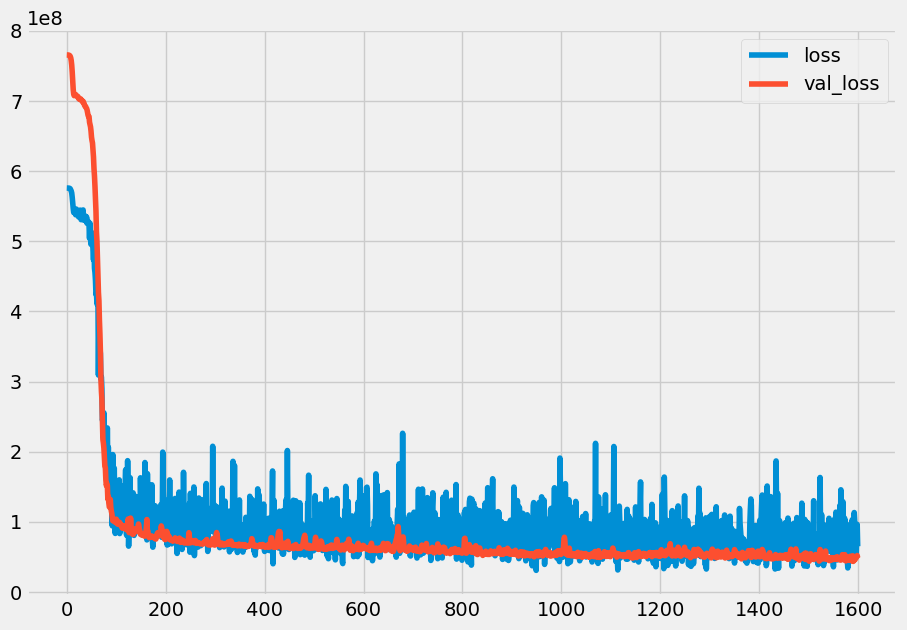

In [47]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [50]:
predictions = model.predict(X_test)
y_test_array = np.squeeze(y_test)
predictions = np.squeeze(predictions)
import scipy
scipy.stats.pearsonr(y_test_array, predictions)

8/8 [==============================] - 0s 2ms/step


PearsonRResult(statistic=0.9701622951774905, pvalue=1.8580638216720345e-148)

In [58]:
# I'll try later
e = shap.KernelExplainer(model, X_train[280:330])
shap_values = e.shap_values(X_test)

  0%|          | 0/240 [00:00<?, ?it/s]

In [169]:
shap_values = shap_values.reshape(240,17)

In [170]:
shap_values.shape

(240, 17)

In [164]:
features.shape

(17,)

In [181]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
# WORKS!!!
shap.force_plot(e.expected_value[0], shap_values[0], features = df.columns[1:])

In [122]:
df3 = low_df["IFF"].median()
low_df.loc[low_df["IFF"] < df3, "IFF"] = 1
low_df.loc[low_df["IFF"] >= df3, "IFF"] = 2
df4 = high_df["IFF"].median()
high_df.loc[high_df["IFF"] < df4, "IFF"] = 3
high_df.loc[high_df["IFF"] >= df4, "IFF"] = 4
frames = [low_df, high_df]
df = pd.concat(frames)

In [123]:
df.drop("IFF_Quartile",axis=1,inplace=True)
df

,IFF,VoiceAcct,PoliStabNoViolence,GovtEffect,RegQua,RuleofLaw,ContofCorrup,undp_hdi,hdi_life_exp,hdi_educ,hdi_income,vulnerable_employment,aid_percentage_gni,pop,gdppc,urban,lifeexp,Year
Country,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,0.455,0.752,0.618,0.623,47.58,3.800000,28004331,1065.000,23.000,60.0000,0
Albania,2.0,0.141477,-0.045141,-0.254886,0.241446,-0.494370,-0.545271,0.733,0.865,0.650,0.699,56.48,3.013453,2927519,10313.930,51.076,76.2210,0
Antigua and Barbuda,1.0,0.589428,0.721794,0.497778,0.653302,0.972667,1.317765,0.778,0.752,0.618,0.623,47.58,3.800000,86219,11884.000,26.000,75.0000,0
Armenia,2.0,-0.876420,0.227863,-0.019941,0.273454,-0.468711,-0.621460,0.742,0.817,0.729,0.687,42.59,4.503305,2888094,9052.384,63.540,73.1180,0
Aruba,1.0,1.252344,1.121554,1.496456,-1.538727,1.426207,1.109148,0.790,0.752,0.618,0.623,47.58,3.800000,101484,27499.000,44.000,75.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,4.0,-0.037783,-1.869737,-0.436756,-0.244220,-0.743864,-0.901347,0.774,0.799,0.792,0.731,14.93,0.911093,44622518,12338.000,69.352,71.5827,9
United Arab Emirates,4.0,-1.126921,0.704976,1.423729,0.928818,0.799745,1.147508,0.863,0.792,0.668,0.665,44.13,3.160000,8264070,43293.000,86.000,77.0000,9
Uruguay,3.0,1.180035,1.034957,0.530200,0.632341,0.595442,1.238815,0.816,0.889,0.763,0.801,24.43,0.000000,3449290,23035.080,95.334,77.7700,9


In [92]:
X=df.drop("IFF",axis=1)
y=df['IFF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [93]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        90
         2.0       0.00      0.00      0.00        65
         3.0       0.29      0.62      0.39        69
         4.0       0.40      0.79      0.53        76

    accuracy                           0.34       300
   macro avg       0.17      0.35      0.23       300
weighted avg       0.17      0.34      0.23       300



In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 0,  0, 56, 34],
       [ 0,  0, 35, 30],
       [ 0,  1, 43, 25],
       [ 0,  0, 16, 60]], dtype=int64)

In [96]:
from sklearn.model_selection import train_test_split
X=df.drop("IFF",axis=1)
y=df['IFF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in range(X.shape[1])]
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[85  5  0  0]
 [ 4 55  6  0]
 [ 0  3 64  2]
 [ 0  0  2 74]]


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95        90
         2.0       0.87      0.85      0.86        65
         3.0       0.89      0.93      0.91        69
         4.0       0.97      0.97      0.97        76

    accuracy                           0.93       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.93      0.93       300



In [100]:
importances = rfc.feature_importances_
feature_names = list(X.columns)

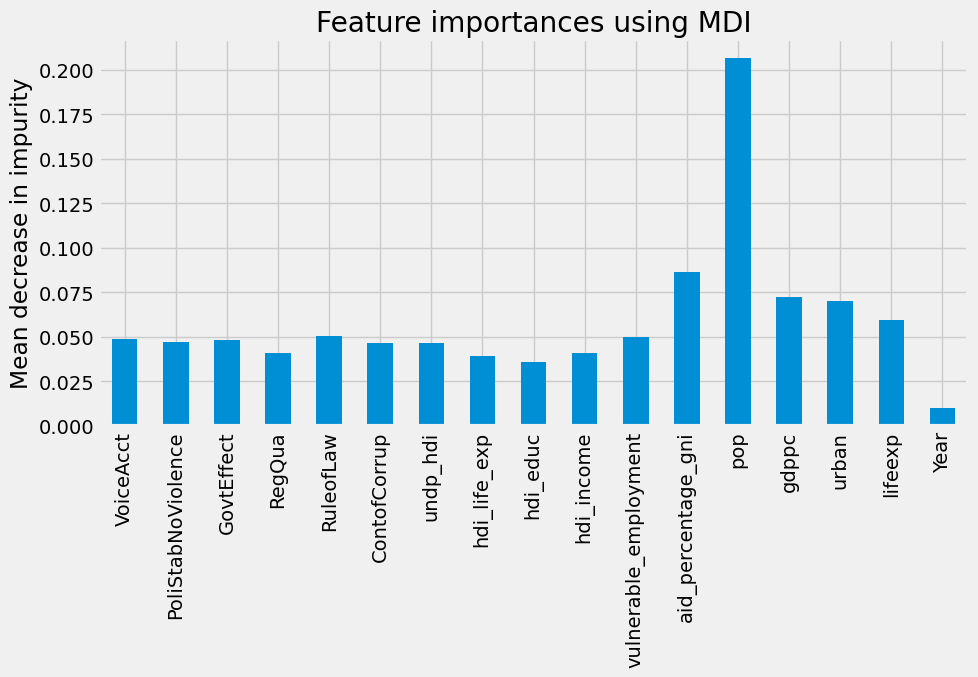

In [103]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score

In [137]:
df = df.astype('double')
X=df.drop("IFF",axis=1).values
y=df['IFF'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [161]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a PyTorch dataset and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_prob=0.2):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.output_layer = nn.Linear(hidden_sizes[-1], num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = self.relu(layer(x))
            x = self.dropout(x)
        out = self.output_layer(x)
        return out

# Initialize the model, loss function, and optimizer
input_size = 17  # Number of features in your input data
hidden_sizes = [162, 81, 40, 20, 10]  # Size of hidden layers
num_classes = 5  # Number of classes in your classification task
model = NeuralNetwork(input_size=input_size, hidden_sizes=hidden_sizes, num_classes=num_classes).float()  # Set the model to use float precision
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs.float())  # Convert input data to float precision
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs.float())  # Convert input data to float precision
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

f1_macro = f1_score(y_true, y_pred, average='macro')
print(f'F1 Macro Average: {f1_macro:.2f}')

F1 Macro Average: 0.94
